## 6388040 Ariya Phengphon (Section 2)
### Lab 11 : Introduction to data science using case studies in Kaggle

### Obtaining the Data

In [6]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [7]:
# Use panda to read csv file
df = pd.read_csv('HR_comma_sep.csv', index_col=None)

In [8]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [9]:
# Print the first X rows from the dataset (default will be set to 5 rows)
df.head()
# head() if not have any number in the parenthesis (), it will set the default to be the first 5 rows

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
# Rename the certain columns
df = df.rename(columns={'satisfaction_level': 'satisfaction',
'last_evaluation': 'evaluation',
'number_project': 'projectCount',
'average_montly_hours': 'averageMonthlyHours',
'time_spend_company': 'yearsAtCompany',
'Work_accident': 'workAccident',
'promotion_last_5years': 'promotion',
'sales' : 'department',
'left' : 'turnover'
})
df.head()
# rename each column by old:new and print for first 5 rows,
# head() if not have any number in the parenthesis (), it will set the default to be the first 5 rows


,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [20]:
# Get column turnover first
front = df['turnover']
# Delete the column name is turnover
df.drop(labels=['turnover'], axis=1, inplace = True) # (axis = 1 means that drop labels from columns, 0 = index)
df.insert(0, 'turnover', front)                      # (inplace = True means that do operation replace, False = return a copy)
df.head()                           # insert column 0 with the data from front
# What is the output? Try to interpret the output.
# = the process is to duplicate the old one, then drop it and insert the new role (compared with upper table for better explanation)
# turnover be on column 0 instead of satisfaction

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


### = Milestone 1 Completed =

### Exploring the Data

In [12]:
print(df.shape)     # shape:    Describe how many rows and columns of the dataset
print(df.dtypes)    # dtypes:   Describe what types of each data in the column
df.describe()       # describe: Describe the dataset in term of statistical characteristics

# How many rows and column contain in the dataset?
# = 14999 rows, and 10 columns
# What is the data type of the features (columns)?
# datatype is followed below here, read this

(14999, 10)
turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
department              object
salary                  object
dtype: object


,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [22]:
turnover_rate = df.turnover.value_counts() / len(df)
print(turnover_rate)   # .value_counts(): Return a Series containing counts of unique values.
                # count each value in turnover column that's unique
# What is the meaning of the output?
# = the meaning of the output is to find the percent of turnover, by counts each type and dived by all rows it exits
print(len(df))

0    0.761917
1    0.238083
Name: turnover, dtype: float64
14999


In [14]:
turnover_Summary = df.groupby('turnover')   # use 'turnover' column to seperate each column
turnover_Summary.mean() # compute mean of each result

# What is the meaning of the output?
# = the meaing of the output is when we used group by to seperate the var
# corresponding to each column

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


### = Milestone 2 Completed =

### Correlation Matrix and Heatmap

### Scrubbing the Data

<AxesSubplot:>

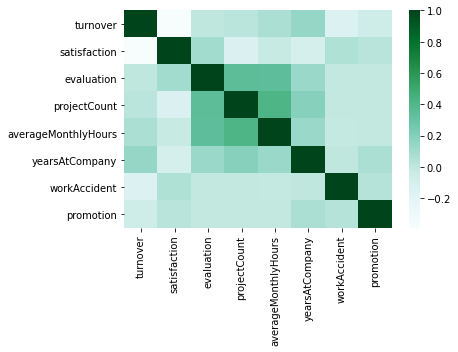

In [15]:
corr = df.corr()    # .corr(): Compute pairwise correlation of columns, excluding NA/null values. (correlation coefficient)
# print("corr",corr)  # relation among two variables, 0 = no relation, 1 = positive relation when one increases another increase follow, -1 = negative relation
sns.heatmap(corr, xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="BuGn")
# .heatmap():
#   - xticklabels, yticklabels: If True, plot the column names of the dataframe.
#   - cmap: mapping from data values to color space

# What is the meaning of the output?
# = it shows the relation between two variables in each column, the result in between [-1,1] ex: turnover and turnover => 1.00
# What is the different between positive and negative numbers?
# = postive relation [1 or close to 1] means that when one increases it affects the another one to be increased
# = negative relation [-1 or close to -1] means that when one decreases it affects the another one to be decreases
# What features affect our target variable the most (turnover)?
# = satisfaction?, its white one <Not sure>
# What features have strong correlations with each other?
# = variable that has corr = 1, same variable


### Salary V.S. Turnover

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

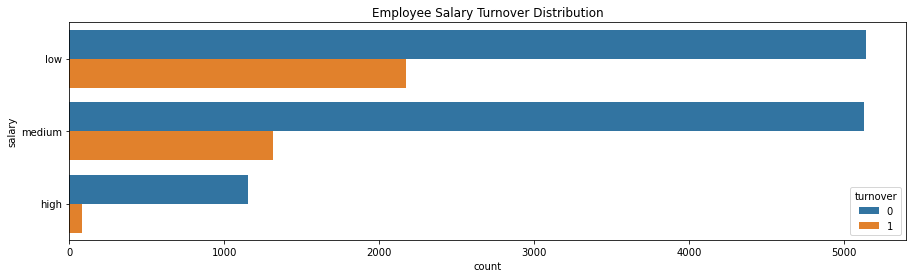

In [16]:
f, ax = plt.subplots(figsize=(15, 4)) # f = figure size, ax = axes
sns.countplot(y="salary", hue='turnover', data=df).set_title('Employee Salary Turnover Distribution')
salary = df.salary.value_counts()
salary
# countplot: Show the counts of observations in each categorical bin using bars.
# hue: Grouping variable that will produce points with different colors.

# Which salary level is the majority of employees who left the company?
# = low salary
# Are there any high salary employee left the company?
# = yes, but it is the least one (noi mak)

### Department V.S. Turnover

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

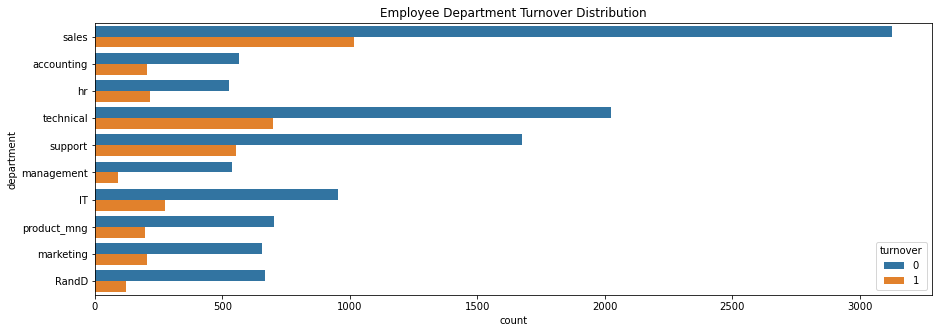

In [17]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='turnover', data=df).set_title('Employee Department Turnover Distribution')
department = df.department.value_counts()   # if set y = horizontal bar, x = vertical bar
department
# What are the top three highest turnover rate departments?
# sales, technical and support in order (look orange one)

### Turnover V.S. ProjectCount

[Text(0, 0.5, 'Percent')]

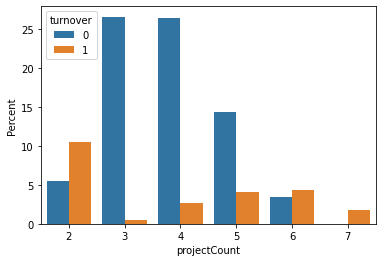

In [18]:
ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover",
                data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent") # estimator: Statistical function to estimate within each categorical bin.

# what is the majority of the employees who did not leave the company
# Who do not leave company (0) => when project count around 3-4 project

### Turnover V.S. Evaluation

Text(0.5, 1.0, 'Employee Evaluation Distribution - Turnover V.S. No Turnover')

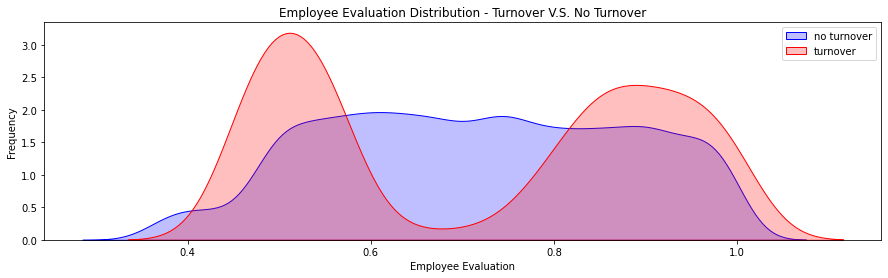

In [19]:
fig = plt.figure(figsize=(15,4))
ax = sns.kdeplot(df.loc[(df['turnover'] == 0),'evaluation'] ,   # loc property is used to access a group of rows and columns by label(s) or a boolean array.
color = 'b', shade=True, label='no turnover')                   # .loc[] is primarily label based, but may also be used with a boolean array.
ax = sns.kdeplot(df.loc[(df['turnover'] == 1),'evaluation'] ,
color = 'r', shade=True, label='turnover')
ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
ax.legend()
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')

# evaluation = df.evaluation.value_counts() / len(df)
# print(evaluation) # .value_counts(): Return a Series containing counts of unique values.
                    # count each value in turnover column that's unique

# print(df.loc[(df['turnover'] == 0),'evaluation'])

# Which evaluation level of employees tend to leave the company?
# [0.4, 0.6] and [0.8, 1.0]